In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('billionaires.csv')

In [9]:
df.head()
df.count()

rank                                          2640
finalWorth                                    2640
category                                      2640
personName                                    2640
age                                           2575
country                                       2602
city                                          2568
source                                        2640
industries                                    2640
countryOfCitizenship                          2640
organization                                   325
selfMade                                      2640
status                                        2640
gender                                        2640
birthDate                                     2564
lastName                                      2640
firstName                                     2637
title                                          339
date                                          2640
state                          

In [4]:
finalworth = df['finalWorth']

In [8]:
mean_finalworth = finalworth.mean()
median_finalworth = finalworth.median()
skewness_finalworth = finalworth.skew()
kurtosis_finalworth = finalworth.kurt()

print(mean_finalworth)
print(median_finalworth)
print(skewness_finalworth)
print(kurtosis_finalworth)

4623.787878787879
2300.0
10.012367321086751
145.07368067526582


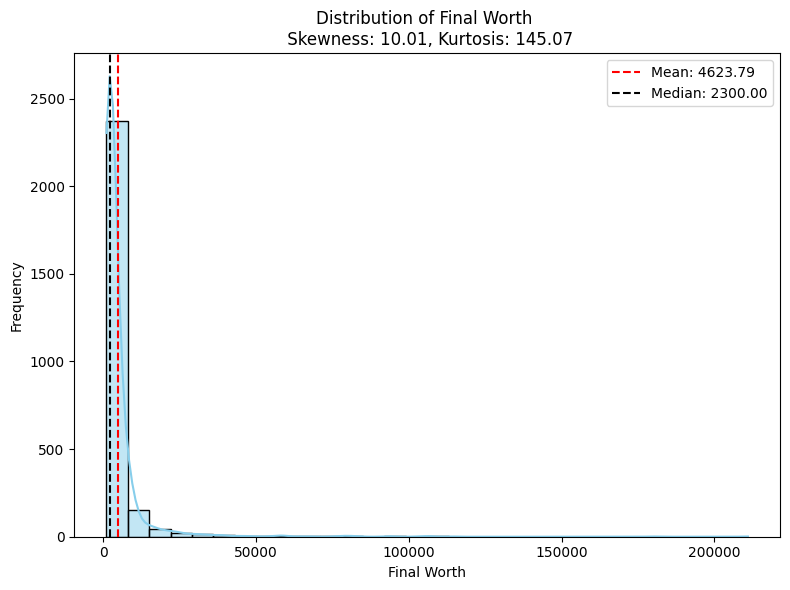

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(finalworth,kde=True, color='skyblue', bins=30)
plt.axvline(mean_finalworth, color='red', linestyle='--', label=f'Mean: {mean_finalworth:.2f}')
plt.axvline(median_finalworth, color='black', linestyle='--', label=f'Median: {median_finalworth:.2f}')
plt.title(f'Distribution of Final Worth \n Skewness: {skewness_finalworth:.2f}, Kurtosis: {kurtosis_finalworth:.2f}')
plt.xlabel('Final Worth')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

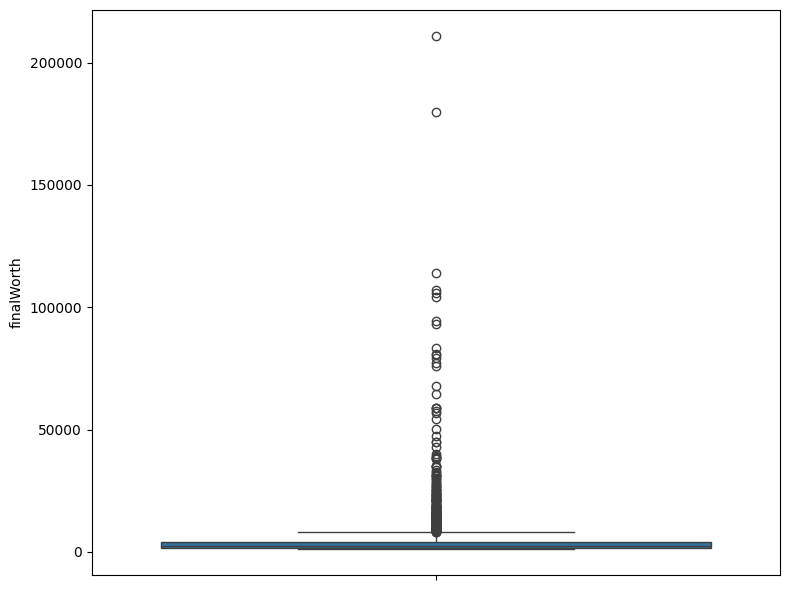

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(finalworth)
plt.tight_layout()
plt.show()

In [14]:
q1 = df['finalWorth'].quantile(0.25)
q3 = df['finalWorth'].quantile(0.75)
iqr = q3-q1

lower_fence = q1-(3*iqr)
upper_fence = q3+(3*iqr)

df['is_extreme'] = (df['finalWorth'] < lower_fence) | (df['finalWorth'] > upper_fence)

num_extreme = df['is_extreme'].sum()
print(f'Number of extreme outliers: {num_extreme}')

Number of extreme outliers: 140


In [16]:
df = df[df['is_extreme'] == False].copy()
finalworth = df['finalWorth']
mean_finalworth = finalworth.mean()
median_finalworth = finalworth.median()
skewness_finalworth = finalworth.skew()
kurtosis_finalworth = finalworth.kurt()

print(mean_finalworth)
print(median_finalworth)
print(skewness_finalworth)
print(kurtosis_finalworth)

3035.68
2200.0
1.6646313461296731
2.4284061542640627


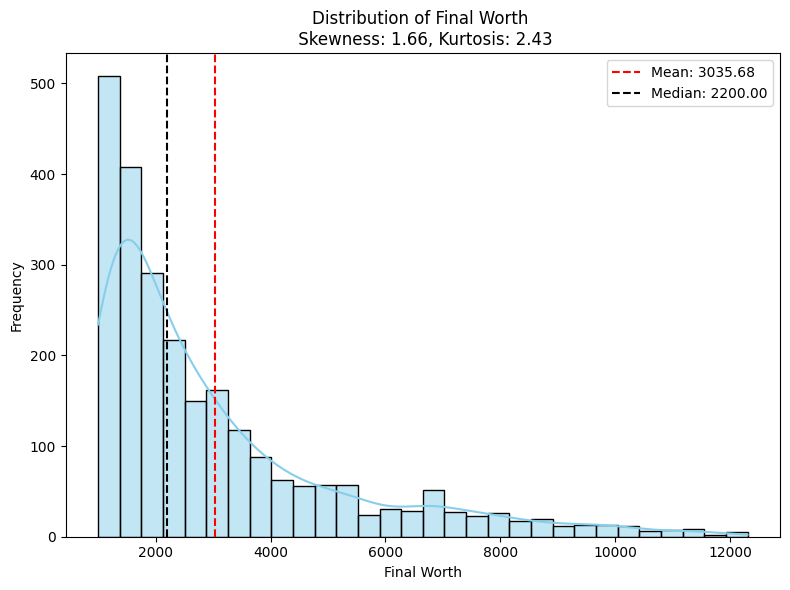

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(finalworth,kde=True, color='skyblue', bins=30)
plt.axvline(mean_finalworth, color='red', linestyle='--', label=f'Mean: {mean_finalworth:.2f}')
plt.axvline(median_finalworth, color='black', linestyle='--', label=f'Median: {median_finalworth:.2f}')
plt.title(f'Distribution of Final Worth \n Skewness: {skewness_finalworth:.2f}, Kurtosis: {kurtosis_finalworth:.2f}')
plt.xlabel('Final Worth')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

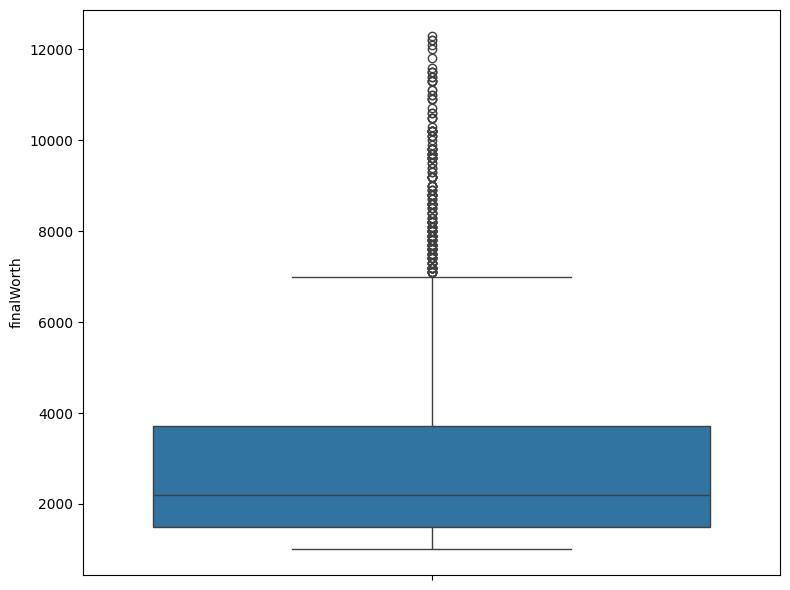

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(finalworth)
plt.tight_layout()
plt.show()

In [ ]:
# Compare CoV of 2 categories

group1_name = 'Fashion & Retail'
group2_name = 'Technology'

group1 = df[df['category'] == group1_name]['finalWorth']
group2 = df[df['category'] == group2_name]['finalWorth']

# Calculate CoV

cov_grp1 = group1.std()/group1.mean()*100
cov_grp2 = group2.std()/group2.mean()*100

print(f'Coefficient of Variation of Group 1: {cov_grp1:.2f}%')
print(f'Coefficient of Variation of Group 2: {cov_grp2:.2f}%')

Coefficient of Variation of Group 1: 73.09%
Coefficient of Variation of Group 2: 77.09%
